In [2]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta

In [3]:
vt, ic, gm, c, c1, c2, l, r, re, rl, rp, vs, vb, s, b = sym.symbols('vt, ic, gm, c, c1, c2, l, r, re, rl, rp, vs, vb, s, b')
A = sym.Matrix([[s*c1, -gm, -1, -gm*vb],
               [0, s*c2+1/re-vb*(re/(re+rp)), -1/2, vb/rp+(vs/(2*rl))],
               [1, 1, s*l+rl, vs]])

In [17]:
f = ic**2*(rl/(b*vt))+ic*((vb-vs)/(b*vt)+1+rl/re)-vs/re
f = f.replace(c2, c1)
f = f.replace(c1, 10e-9)
f = f.replace(rl, 1)
f = f.replace(re, 100)
f = f.replace(vt, 0.025)
f = f.replace(b, 50)
f = f.replace(vs, 3.0)
f = f.replace(vb, 2.0)
f = f.replace(l, 1e-6)
Ic = sym.solve(f)

In [18]:
A = A.replace(c2, c1)
A = A.replace(c1, 10e-9)
A = A.replace(rl, 1)
A = A.replace(re, 100)
A = A.replace(rp, b/gm)
A = A.replace(gm, ic/vt)
A = A.replace(vt, 0.025)
A = A.replace(b, 50)
A = A.replace(vs, 3.0)
A = A.replace(vb, 2.0)
A = A.replace(l, 1e-6)
A = A.replace(ic, Ic[1])

A

Matrix([
[1.0e-8*s,           -4.10748363610645,           -1, -8.2149672722129],
[       0, 1.0e-8*s - 1.77296179021375,         -0.5, 1.66429934544426],
[       1,                           1, 1.0e-6*s + 1,              3.0]])

In [19]:
B = A.rref()

In [31]:
print(B[0][3])

(-8.2149672722129e-22*s**3 + 3.59135788172527e-13*s**2 - 3.76858135630094e-5*s - 29.2032736599707)/(1.0e-30*s**4 - 3.53592358042749e-22*s**3 + 3.1229342737537e-14*s**2 + 7.64730852076792e-9*s - 0.497812260814547)


In [59]:
print(B[0][7])

(1.66429934544426e-22*s**3 - 2.91909615349601e-14*s**2 + 1.61601149279669e-9*s - 10.2331506876954)/(1.0e-30*s**4 - 3.53592358042749e-22*s**3 + 3.1229342737537e-14*s**2 + 7.64730852076792e-9*s - 0.497812260814547)


In [62]:
print(B[0][11])

(3.0e-16*s**2 + 1.2317825561274e-8*s - 21.4009054084849)/(1.0e-22*s**3 - 1.76296179021375e-14*s**2 - 2.72961790213747e-9*s + 0.280780027839478)


In [39]:
h = 10
t = np.arange(1e4, 2e8, h)
x = []
for s in t:
    x1 = (-8.2149672722129e-22*s**3 + 3.59135788172527e-13*s**2 - 3.76858135630094e-5*s - 29.2032736599707)/(1.0e-30*s**4 - 3.53592358042749e-22*s**3 + 3.1229342737537e-14*s**2 + 7.64730852076792e-9*s - 0.497812260814547)
    x.append(x1)

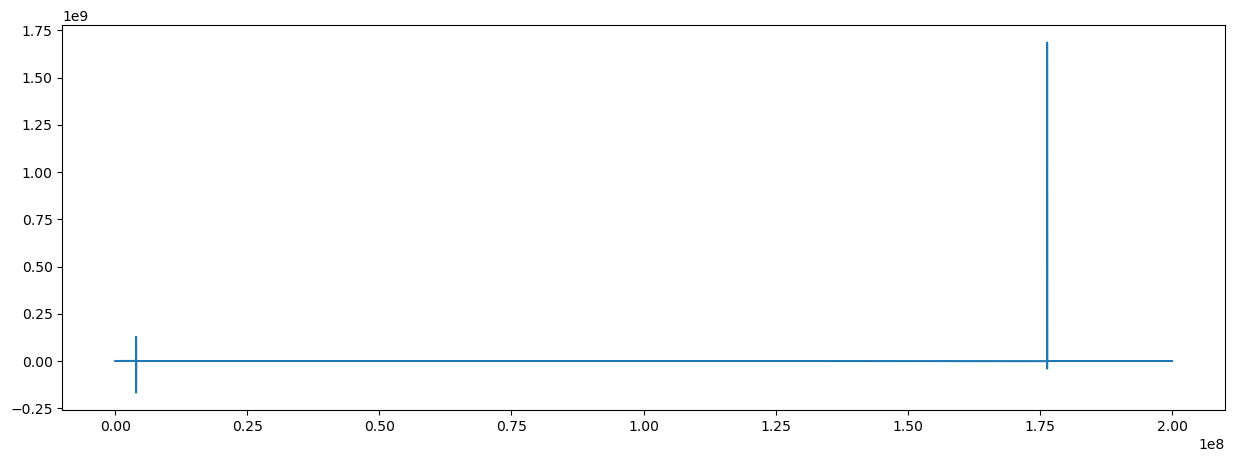

In [40]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(1, 1, 1)
ax0.plot(t, x)

(3957500.0, 3958500.0)

(-250000000.0, 275000000.0)

(176360000.0, 176362000.0)

(-250000000.0, 1750000000.0)

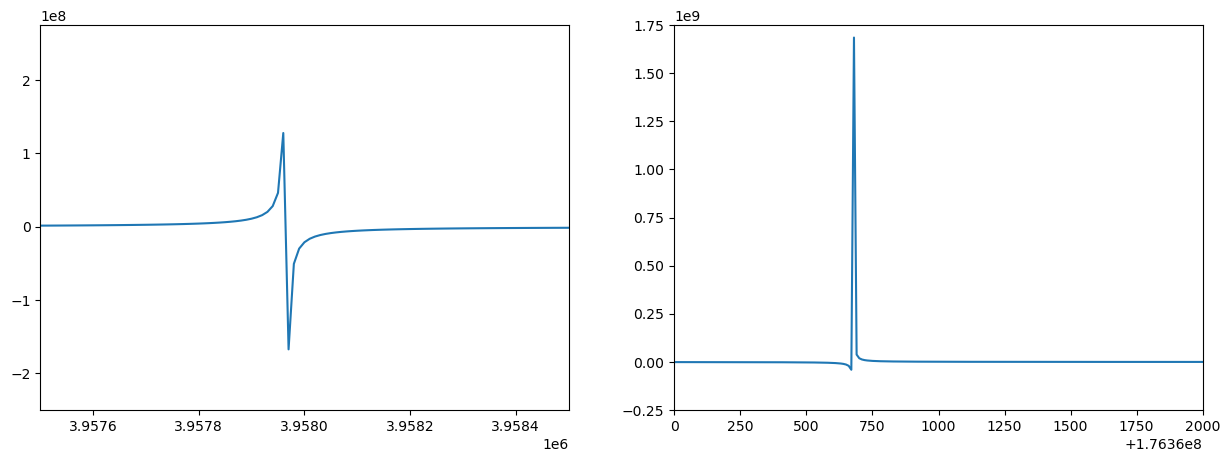

In [58]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim(left=3.9575e6,right=3.9585e6)
ax1.set_ylim(bottom=-0.25e9,top=0.275e9)
ax1.plot(t, x)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim(left=1.7636e8,right=1.76362e8)
ax2.set_ylim(bottom=-0.25e9,top=1.75e9)
ax2.plot(t, x)

In [60]:
h = 10
t = np.arange(1e4, 2e8, h)
y = []
for s in t:
    y1 = (1.66429934544426e-22*s**3 - 2.91909615349601e-14*s**2 + 1.61601149279669e-9*s - 10.2331506876954)/(1.0e-30*s**4 - 3.53592358042749e-22*s**3 + 3.1229342737537e-14*s**2 + 7.64730852076792e-9*s - 0.497812260814547)
    y.append(y1)

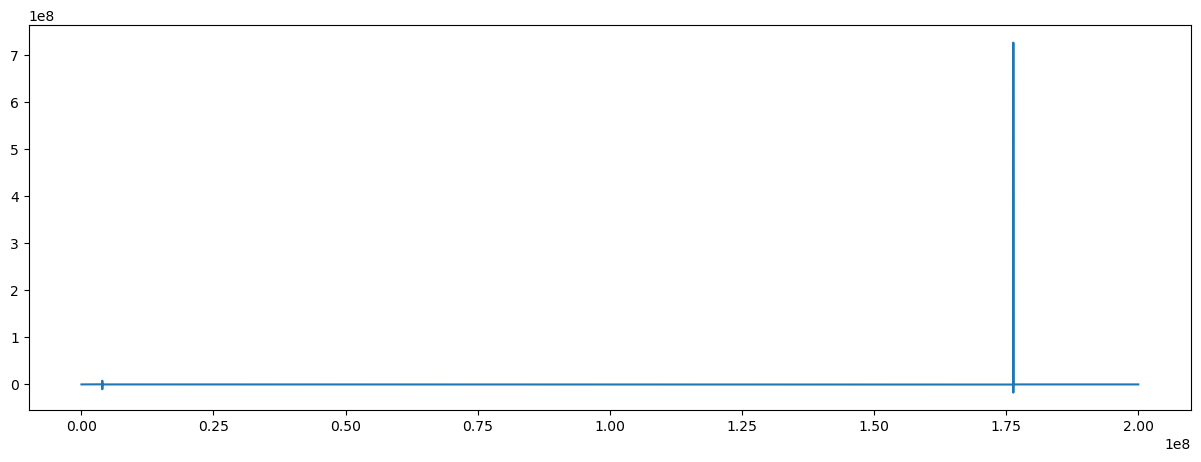

In [61]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(1, 1, 1)
ax0.plot(t, x)

In [64]:
h = 10
t = np.arange(1e4, 2e8, h)
z = []
for s in t:
    z1 = (3.0e-16*s**2 + 1.2317825561274e-8*s - 21.4009054084849)/(1.0e-22*s**3 - 1.76296179021375e-14*s**2 - 2.72961790213747e-9*s + 0.280780027839478)
    z.append(z1)

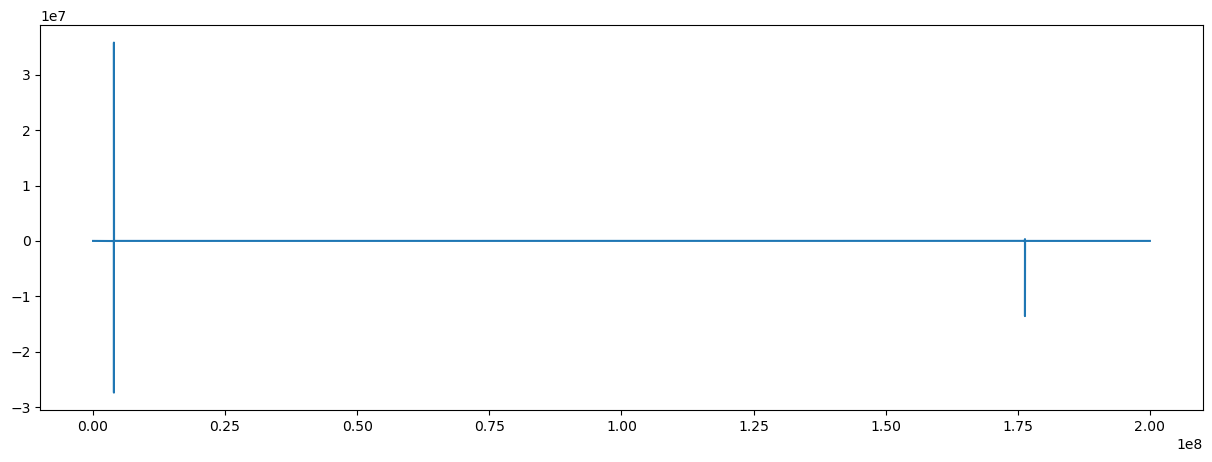

In [65]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(1, 1, 1)
ax0.plot(t, z)

In [29]:
w0 = sym.symbols('w0')
w = (1+w0**2*c1*c2*re*rl+w0**2*c1*l)/(1-w0**2*c1*c2*re*rl-w0**2*c1*l)
#w = w.replace(s, sym.I*w0)

In [30]:
# w = w.replace(c1, c)
# w = w.replace(c2, c)
# w = w.replace(rp, (b*vt)/ic)
# w = w.replace(re, 100*r)
# w = w.replace(rl, r)
w
g = sym.solve(w, w0)

(c1*c2*re*rl*w0**2 + c1*l*w0**2 + 1)/(-c1*c2*re*rl*w0**2 - c1*l*w0**2 + 1)

In [32]:
g[0]
g[1]

-sqrt(-1/(c1*(c2*re*rl + l)))

sqrt(-1/(c1*(c2*re*rl + l)))

In [33]:
w = (c1+c2+w0**2*c1*c2*l)/(-c1+c2-w0**2*c1*c2*l)

In [34]:
g=sym.solve(w,w0)

In [36]:
g[0]
g[1]

sqrt((-c1 - c2)/(c1*c2*l))

-sqrt(-(c1 + c2)/(c1*c2*l))

In [21]:
Is, x2 = sym.symbols('Is, x2')
f = (Is/(c1*vt))*sym.exp((vb-x2)/vt)+1/c1
g = (-1/(b*c2))*(Is/(vt))*sym.exp((vb-x2)/vt)-1/(c2*re)+1/c2
h = -2/l-rl/l

In [24]:
f1 = f+g+h
g1 = sym.solve(f1, x2)

In [28]:
g1[0]

vt*log(Is*l*re*(b*c2 - c1)*exp(vb/vt)/(b*vt*(c1*c2*re*rl + 2*c1*c2*re - c1*l*re + c1*l - c2*l*re)))